# Exploring Ebay Car Sales Data

In this project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a [classified](https://en.wikipedia.org/wiki/Classified_advertising) section of the German eBay website. 

The dataset was uploaded to [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data). We made a few modifications to the data as follows.

* We sampled 50,000 data points from the full dataset, to make sure the code runs quickly.
* We dirtied the dataset a bit so we can practise cleaning the data. 

The data dictionary provided with the dataset is as follows:

* **dateCrawled** - When this ad was first crawled. All field-values are taken from this date.
* **name** -Name of the car.
* **seller** -Whether the seller is private or a dealer.
* **offerType** - The type of listing.
* **abtest** -Whether the listing is included in an A/B test.
* **vehicleType** -The vehicle Type.
* **yearOfRegistration** -The year in wich the car was first registered
* **gearbox** -The transmission type
* **model** -The car model name
* **kilometer**- How many kilometers the car has driven
* **monthOfRegistration** - The month in which the car was first registered.
* **fuelType** -The brand of the car
* **notRepairedDamage** -If the car has a damage which is not yet repaired.
* **dateCreated** -The date on which the eBay listing was created.
* **nrOfPictures** -The number of pictures in the ad
* **postalCode** -The postal code for the location of the vehicle.
* **lastSeenOnline** -When the crawler saw this ad last online.

In [1]:
#import the pandas and numpy libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#read in the dataset
autos = pd.read_csv("autos.csv", encoding = "Latin-1")

In [3]:
#print the dataset
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,0,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,0,15749,2016-04-06 10:46:35


In [4]:
#get the info of the dataset
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

In [5]:
# get the head of the dataset
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


We can make the following observations:

* The dataset contains 20 columns, most of which are strings.
* Some columns have null values, but none have more than ~ 20% null values.
* The column names use [camelCase](https://en.wikipedia.org/wiki/Camel_case) instead of Python's preferred [snake_case](https://en.wikipedia.org/wiki/Snake_case), which means we can't just replace spaces with underscores. 

Let's convert the column names from camelCase to snake_case and reword some of the column names based on the data dictionary to be more descriptive. 

In [6]:
# print the column names
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [7]:
#convert column names from camelCase to snake_case
columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'year_of_registration', 'gear_box', 'power_ps', 'model',
       'odometer', 'month_of_registration', 'fuel_type', 'brand',
       'not_repaired_damage', 'date_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

In [8]:
#assign the column names back to the datafram
autos.columns = columns

In [9]:
#see the head of the dataframe again
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gear_box,power_ps,model,odometer,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Now let us do some basic data exploration to determine what other cleaning tasks need to be done. Initially we will look for: -Text columns where all or almost all values are the same. These can often be dropped as they don't have useful information for analysis. -Example of numeric data stored as text which can be cleaned and converted.

In [10]:
#use describe to give a quick summary of the data, 
#include = 'all' to get also categorical columns
autos.describe(include = 'all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gear_box,power_ps,model,odometer,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-21 16:37:21,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Observe that the columns **seller**, **offer_type**, **abtest**, **gear_box**, **not_repaired_damage** have only two distinct values, so they can be dropped.

The **price** and **odometer** columns are numeric values stored at text. For each column:

* Remove any non-numeric characters.
* Convert the column to a numeric dtype.
* Use DataFrame.rename() to rename the **odometer** column to **odometer_km**.

In [11]:
#remove the '$' sign from price
autos['price'] = autos['price'].str.replace("$","")
#remove "," from price
autos['price'] = autos['price'].str.replace(",","")
#convert to float type
autos['price'] = autos['price'].astype(float)

In [12]:
#remove 'km' from odometer
autos['odometer'] = autos['odometer'].str.replace("km","")
#remove ',' from odometer
autos['odometer'] = autos['odometer'].str.replace(",","")
#convert to float type
autos['odometer'] = autos['odometer'].astype(float)
#rename odometer to odometer_km
autos.rename({'odometer':'odometer_km'}, axis = 1,inplace = True)

In [13]:
#check the info again
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
date_crawled             50000 non-null object
name                     50000 non-null object
seller                   50000 non-null object
offer_type               50000 non-null object
price                    50000 non-null float64
abtest                   50000 non-null object
vehicle_type             44905 non-null object
year_of_registration     50000 non-null int64
gear_box                 47320 non-null object
power_ps                 50000 non-null int64
model                    47242 non-null object
odometer_km              50000 non-null float64
month_of_registration    50000 non-null int64
fuel_type                45518 non-null object
brand                    50000 non-null object
not_repaired_damage      40171 non-null object
date_created             50000 non-null object
nr_of_pictures           50000 non-null int64
postal_code              50000 non-null int64
l

Let's explore the odometer_km feature

In [14]:
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [15]:
autos['odometer_km'].value_counts().sort_index(ascending = False)

150000.0    32424
125000.0     5170
100000.0     2169
90000.0      1757
80000.0      1436
70000.0      1230
60000.0      1164
50000.0      1027
40000.0       819
30000.0       789
20000.0       784
10000.0       264
5000.0        967
Name: odometer_km, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cc3fe7630>]],
      dtype=object)

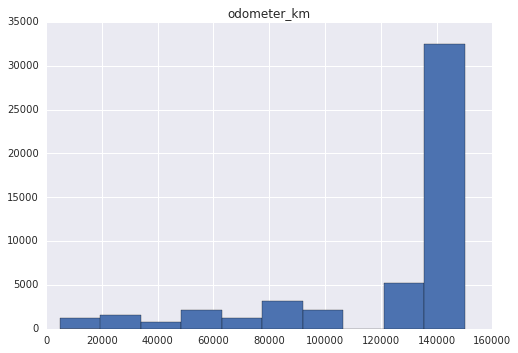

In [16]:
autos.hist(column = 'odometer_km')

Let's explore the price column

In [17]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cc46d79b0>]],
      dtype=object)

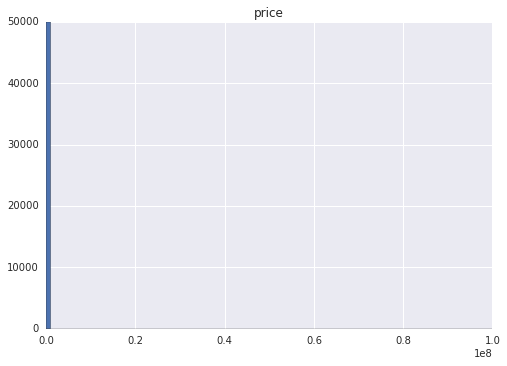

In [18]:
autos.hist(column = 'price', bins = 100)

In [19]:
autos['price'].value_counts().head(10)

0.0       1421
500.0      781
1500.0     734
2500.0     643
1200.0     639
1000.0     639
600.0      531
800.0      498
3500.0     498
2000.0     460
Name: price, dtype: int64

In [20]:
#drop the row with price = 0
autos = autos[autos['price']>0]

In [21]:
autos['price'].describe()

count    4.857900e+04
mean     1.012788e+04
std      4.880873e+05
min      1.000000e+00
25%      1.200000e+03
50%      3.000000e+03
75%      7.490000e+03
max      1.000000e+08
Name: price, dtype: float64

Now let's move on to the date column

There are three columns that contains date **date_crawled**, **last_seen**, and **ad_created**.

Let's first look at the **date_crawled** feature

In [22]:
#normalize = True means we use frequency instead of count
#dropna means we also include missing values
autos['date_crawled'].str[:10].value_counts(normalize = True,dropna = False).sort_index()

2016-03-05    0.025320
2016-03-06    0.014039
2016-03-07    0.036003
2016-03-08    0.033327
2016-03-09    0.033101
2016-03-10    0.032174
2016-03-11    0.032566
2016-03-12    0.036930
2016-03-13    0.015665
2016-03-14    0.036538
2016-03-15    0.034274
2016-03-16    0.029601
2016-03-17    0.031639
2016-03-18    0.012907
2016-03-19    0.034768
2016-03-20    0.037876
2016-03-21    0.037403
2016-03-22    0.033018
2016-03-23    0.032216
2016-03-24    0.029334
2016-03-25    0.031598
2016-03-26    0.032195
2016-03-27    0.031083
2016-03-28    0.034850
2016-03-29    0.034130
2016-03-30    0.033677
2016-03-31    0.031845
2016-04-01    0.033677
2016-04-02    0.035468
2016-04-03    0.038597
2016-04-04    0.036518
2016-04-05    0.013092
2016-04-06    0.003170
2016-04-07    0.001400
Name: date_crawled, dtype: float64

Now the **last_seen** feature

In [23]:
autos['last_seen'].str[:10].value_counts(normalize = True, dropna = False).sort_index()

2016-03-05    0.001070
2016-03-06    0.004323
2016-03-07    0.005393
2016-03-08    0.007431
2016-03-09    0.009613
2016-03-10    0.010663
2016-03-11    0.012372
2016-03-12    0.023796
2016-03-13    0.008893
2016-03-14    0.012598
2016-03-15    0.015871
2016-03-16    0.016447
2016-03-17    0.028078
2016-03-18    0.007349
2016-03-19    0.015830
2016-03-20    0.020647
2016-03-21    0.020647
2016-03-22    0.021367
2016-03-23    0.018527
2016-03-24    0.019762
2016-03-25    0.019206
2016-03-26    0.016797
2016-03-27    0.015645
2016-03-28    0.020873
2016-03-29    0.022355
2016-03-30    0.024764
2016-03-31    0.023796
2016-04-01    0.022788
2016-04-02    0.024928
2016-04-03    0.025196
2016-04-04    0.024476
2016-04-05    0.124766
2016-04-06    0.221824
2016-04-07    0.131909
Name: last_seen, dtype: float64

Now the **year_of_registration** feature

In [24]:
autos['year_of_registration'].describe()

count    48579.000000
mean      2004.753000
std         88.631663
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: year_of_registration, dtype: float64

Observe that the **year_of_registration** feature contains some odd values

* The minimum value is 1000, before cars were invented.
* The maximum value is 9999, many years into the future

In [25]:
autos['year_of_registration'].value_counts(normalize = True).sort_index()

1000    0.000021
1001    0.000021
1111    0.000021
1800    0.000041
1910    0.000103
1927    0.000021
1929    0.000021
1931    0.000021
1934    0.000041
1937    0.000082
1938    0.000021
1939    0.000021
1941    0.000041
1943    0.000021
1948    0.000021
1950    0.000062
1951    0.000041
1952    0.000021
1953    0.000021
1954    0.000041
1955    0.000041
1956    0.000082
1957    0.000041
1958    0.000082
1959    0.000124
1960    0.000494
1961    0.000124
1962    0.000082
1963    0.000165
1964    0.000247
          ...   
2000    0.064966
2001    0.054283
2002    0.051174
2003    0.055559
2004    0.055641
2005    0.060438
2006    0.054983
2007    0.046872
2008    0.045596
2009    0.042940
2010    0.032710
2011    0.033409
2012    0.026966
2013    0.016530
2014    0.013668
2015    0.008069
2016    0.025114
2017    0.028675
2018    0.009696
2019    0.000041
2800    0.000021
4100    0.000021
4500    0.000021
4800    0.000021
5000    0.000082
5911    0.000021
6200    0.000021
8888    0.0000

We choose the registration_year between 1910 and 2016

In [26]:
#restrict the year of registration to be between 1910 and 2016
autos = autos[(autos['year_of_registration']>=1910)&(autos['year_of_registration']<=2016)] 

In [27]:
#investigate the distributrion of year of registration again
autos['year_of_registration'].value_counts(normalize = True).sort_index()

1910    0.000107
1927    0.000021
1929    0.000021
1931    0.000021
1934    0.000043
1937    0.000086
1938    0.000021
1939    0.000021
1941    0.000043
1943    0.000021
1948    0.000021
1950    0.000064
1951    0.000043
1952    0.000021
1953    0.000021
1954    0.000043
1955    0.000043
1956    0.000086
1957    0.000043
1958    0.000086
1959    0.000128
1960    0.000514
1961    0.000128
1962    0.000086
1963    0.000171
1964    0.000257
1965    0.000364
1966    0.000471
1967    0.000557
1968    0.000557
          ...   
1987    0.001542
1988    0.002891
1989    0.003726
1990    0.007432
1991    0.007260
1992    0.007946
1993    0.009102
1994    0.013471
1995    0.026299
1996    0.029405
1997    0.041784
1998    0.050607
1999    0.062086
2000    0.067590
2001    0.056475
2002    0.053241
2003    0.057803
2004    0.057889
2005    0.062879
2006    0.057203
2007    0.048765
2008    0.047438
2009    0.044675
2010    0.034031
2011    0.034759
2012    0.028056
2013    0.017197
2014    0.0142

Now let's explore the **brand** column

In [28]:
#get the top 20 brands
top20 = autos['brand'].value_counts().head(20).index

In [29]:
#find the mean price of the top 20 brands
top_brand = {}
for brand in top20:
    top = autos[autos['brand'] == brand]
    top_brand[brand] = np.mean(top['price'])

In [30]:
top_brand

{'audi': 9336.687453600594,
 'bmw': 8571.480147917478,
 'citroen': 45486.68549618321,
 'fiat': 2813.748538011696,
 'ford': 7456.547932618683,
 'hyundai': 5365.254273504273,
 'mazda': 4112.596614950635,
 'mercedes_benz': 30829.021092362345,
 'mini': 10613.459657701711,
 'nissan': 4743.40252454418,
 'opel': 5432.479195699781,
 'peugeot': 3094.0172290021537,
 'renault': 2474.8646069968195,
 'seat': 4397.230949589683,
 'skoda': 6368.0,
 'smart': 3580.2239031770046,
 'sonstige_autos': 45208.36442516269,
 'toyota': 5167.091062394604,
 'volkswagen': 6729.81956411556,
 'volvo': 4946.501170960188}

In [34]:
autos.groupby('brand')['price'].mean().sort_values(ascending = False).head(20)

brand
porsche           45643.937063
citroen           45486.685496
sonstige_autos    45208.364425
mercedes_benz     30829.021092
land_rover        19108.091837
jeep              11650.500000
jaguar            11635.493151
mini              10613.459658
audi               9336.687454
bmw                8571.480148
ford               7456.547933
volkswagen         6729.819564
chevrolet          6684.139098
skoda              6368.000000
kia                5982.330303
dacia              5915.528455
opel               5432.479196
hyundai            5365.254274
toyota             5167.091062
volvo              4946.501171
Name: price, dtype: float64

In [36]:
#convert top 20 brands and their mean prices to a dataframe
mean_price = pd.Series(top_brand)
top20 = pd.DataFrame(mean_price, columns = ['mean_price'])

In [37]:
top20

,mean_price
audi,9336.687454
bmw,8571.480148
citroen,45486.685496
fiat,2813.748538
ford,7456.547933
hyundai,5365.254274
mazda,4112.596615
mercedes_benz,30829.021092
mini,10613.459658
nissan,4743.402525


In [38]:
#compute mean mileage
mileage = {}
for brand in top_brand:
    top = autos[autos['brand']==brand]
    mileage[brand] = top['odometer_km'].mean()
    

In [39]:
#convert mileage to a series
mileage = pd.Series(mileage)

In [40]:
#add mileage to the top20 dataframe
top20['mean_mileage'] = mileage

In [41]:
print(top20)

                  mean_price   mean_mileage
audi             9336.687454  129157.386785
bmw              8571.480148  132575.905021
citroen         45486.685496  119572.519084
fiat             2813.748538  117121.971596
ford             7456.547933  124243.491577
hyundai          5365.254274  106442.307692
mazda            4112.596615  124464.033850
mercedes_benz   30829.021092  130792.628774
mini            10613.459658   88105.134474
nissan           4743.402525  118330.995792
opel             5432.479196  129314.154888
peugeot          3094.017229  127153.625269
renault          2474.864607  128071.331213
seat             4397.230950  121131.301290
skoda            6368.000000  110848.563969
smart            3580.223903   99326.777610
sonstige_autos  45208.364425   89707.158351
toyota           5167.091062  115944.350759
volkswagen       6729.819564  128713.634060
volvo            4946.501171  138067.915691


In [42]:
top20.sort_values(by = 'mean_price', ascending = False)

,mean_price,mean_mileage
citroen,45486.685496,119572.519084
sonstige_autos,45208.364425,89707.158351
mercedes_benz,30829.021092,130792.628774
mini,10613.459658,88105.134474
audi,9336.687454,129157.386785
bmw,8571.480148,132575.905021
ford,7456.547933,124243.491577
volkswagen,6729.819564,128713.634060
skoda,6368.000000,110848.563969
opel,5432.479196,129314.154888
